In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

In [2]:
df = pd.read_csv('datasets/train.csv')
df['label'] = df['label'].astype(int)

In [3]:
df = df.drop(columns=['day','transaction_id','card','amount','feature2','feature3','feature7','feature10','feature17','feature19','feature21','feature23'])

In [4]:
df['time'] = pd.to_timedelta(df['time']).dt.total_seconds()

In [5]:
df2 = pd.read_csv('datasets/test.csv')
df2['label'] = df2['label'].astype(int)
df2 = df2.drop(columns=['day','transaction_id','card','amount','feature2','feature3','feature7','feature10','feature17','feature19','feature21','feature23'])
df2['time'] = pd.to_timedelta(df2['time']).dt.total_seconds()

In [6]:
x_test = df2.drop(columns='label')
y_test = df2['label']

In [7]:
scaler = preprocessing.StandardScaler().fit(x_test)
X_test = scaler.transform(x_test)
X_test = pd.DataFrame(X_test)

In [8]:
X = df.drop('label',axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
y = df['label']

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_sample(X_train,y_train)
print(X_sm.shape,y_sm.shape)
print(len(y_sm[y_sm==1]),len(y_sm[y_sm==0]))

(2547060, 17) (2547060,)
1273530 1273530


Confusion Matrix:
 [[258482  59891]
 [    44    203]]
Accuracy:
 0.8118919088569456
Precision:
 0.0033780410689919125
Recall:
 0.8218623481781376
AUC:
 0.9059686324437187


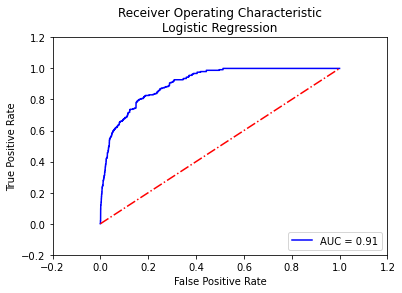

In [11]:
logreg=LogisticRegression()
logreg.fit(X_sm,y_sm)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
y_rf_test3 =logreg.predict(X_test)

In [127]:
threshold = 0.5

In [128]:
y_logreg_prob = logreg.predict_proba(X_test)[:,1]

In [129]:
prob_thresh = (y_logreg_prob>=threshold).astype('int')

In [130]:
CM_2_Thresh = confusion_matrix(y_test,prob_thresh)
CM_2_Thresh

array([[657572, 145100],
       [   164,    486]], dtype=int64)

In [131]:
TN = CM_2_Thresh[0,0]
FP = CM_2_Thresh[0,1]
FN = CM_2_Thresh[1,0]
TP = CM_2_Thresh[1,1]

In [132]:
DR = TP / (TP + FN)
DR

0.7476923076923077

In [133]:
FPR = FP / TP
FPR

298.559670781893

In [46]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf_test3))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf_test3))
print("Precision:\n",metrics.precision_score(y_test,y_rf_test3))
print("Recall:\n",metrics.recall_score(y_test,y_rf_test3))

Confusion Matrix:
 [[657572 145100]
 [   164    486]]
Accuracy:
 0.8191708928673682
Precision:
 0.0033382330718613054
Recall:
 0.7476923076923077


In [47]:
CM = confusion_matrix(y_test,y_rf_test3)

In [48]:
TN = CM[0,0]
FP = CM[0,1]
FN = CM[1,0]
TP = CM[1,1]

In [49]:
DR = TP / (TP + FN)
DR

0.7476923076923077

In [50]:
FPR = FP / TP
FPR

298.559670781893

Confusion Matrix:
 [[318232    141]
 [    35    212]]
Accuracy:
 0.9994476178519867
Precision:
 0.6005665722379604
Recall:
 0.8582995951417004
AUC:
 0.9675681890252453


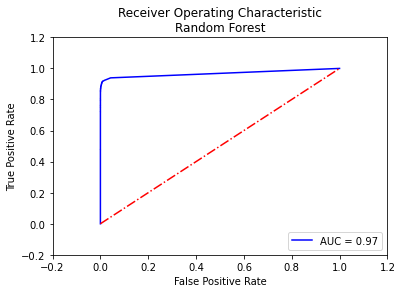

In [41]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_sm,y_sm)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
y_rf_test2 =rf2.predict(X_test)

In [44]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf_test2))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf_test2))
print("Precision:\n",metrics.precision_score(y_test,y_rf_test2))
print("Recall:\n",metrics.recall_score(y_test,y_rf_test2))

Confusion Matrix:
 [[802388    284]
 [   610     40]]
Accuracy:
 0.9988871212290962
Precision:
 0.12345679012345678
Recall:
 0.06153846153846154


Confusion Matrix:
 [[318225    148]
 [    34    213]]
Accuracy:
 0.9994287866423953
Precision:
 0.590027700831025
Recall:
 0.8623481781376519
AUC:
 0.9716328647230946


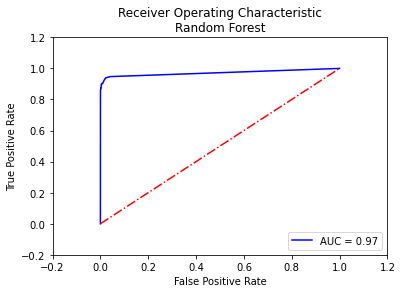

In [14]:


#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [30]:
y_rf_test =rf.predict(X_test)

In [36]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf_test))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf_test))
print("Precision:\n",metrics.precision_score(y_test,y_rf_test))
print("Recall:\n",metrics.recall_score(y_test,y_rf_test))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))

Confusion Matrix:
 [[802390    282]
 [   616     34]]
Accuracy:
 0.9988821419057364
Precision:
 0.10759493670886076
Recall:
 0.052307692307692305
AUC:
 0.9716328647230946


In [37]:
CM = confusion_matrix(y_test,y_rf_test)

In [38]:
TN = CM[0,0]
FP = CM[0,1]
FN = CM[1,0]
TP = CM[1,1]

In [39]:
DR = TP / (TP + FN)
DR

0.052307692307692305

In [40]:
FPR = FP / TP
FPR

8.294117647058824

In [29]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-2.559807,-0.198227,-0.899172,0.841221,1.732160,-0.326141,0.679408,-0.290931,-0.272143,0.756021,0.023609,1.085967,1.947470,-0.160707,-0.633984,-0.483427,0.420202
1,-2.559807,-0.198349,-0.927655,-1.350549,-0.036508,-0.047255,1.123869,2.246920,-0.283637,-0.844524,0.317040,1.050392,-0.525518,0.659836,-0.210469,-0.443810,-0.185671
2,-2.559542,-0.200353,-0.909424,-1.407915,0.174528,-0.028758,0.727973,-0.666932,-0.499981,-1.239008,0.292872,0.768422,-0.029667,-0.083098,0.342530,2.141863,-1.394473
3,-2.557522,-0.190910,-0.912807,1.350543,-1.131364,-0.503321,-1.666894,0.541288,-0.679303,-1.734802,0.309310,0.546204,0.721441,-1.078713,-0.056335,-0.563021,0.233636
4,-2.557468,-0.190910,-0.912807,1.350543,-1.131364,-0.503321,-1.666894,0.541288,-0.679303,-1.734802,0.309310,0.546204,0.721441,-1.078713,-0.056335,-0.563021,0.233636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803317,1.755223,-0.167265,0.993131,-0.268034,1.124106,0.412867,-0.874274,0.018003,-1.334759,-0.834295,3.004874,0.320932,1.257437,0.848156,0.154642,-0.030177,-0.016395
803318,1.755436,-0.167265,0.993131,-0.268034,1.124106,0.412867,-0.874274,0.018003,-1.334759,-0.834295,3.004874,0.320932,1.257437,0.848156,0.154642,-0.030177,-0.016395
803319,1.784354,-0.181102,0.963931,-0.209425,1.074504,0.389389,-0.901787,-0.005390,-1.355991,-0.876396,3.230051,-1.854427,-0.374977,0.834087,0.141363,-0.062063,-0.040528
803320,1.840488,-0.197662,0.990733,-0.263945,1.120010,0.410908,-0.875874,0.016691,-1.336275,-0.836134,3.011629,0.309439,1.253537,0.845373,0.155480,-0.037257,0.009952


In [23]:
X_sm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.152547,-0.200560,0.878243,-0.076746,0.733403,0.375015,-0.818841,-0.151391,0.518763,0.051911,-1.002483,0.407342,0.344516,-0.597010,0.762363,-0.134947,-0.024102
1,-1.185470,-0.201613,0.897881,-0.117155,0.766802,0.391735,-0.800266,-0.137588,0.524101,0.063059,-0.988815,-0.608749,-0.497541,-0.565391,0.745453,-0.049939,-0.028789
2,-1.019329,-0.195870,1.113984,0.107200,-0.127114,-0.028475,0.296552,0.518156,0.013836,-0.021489,0.827053,-0.611826,-0.238195,0.282975,-0.001397,-0.165330,-1.333032
3,-0.891852,-0.189830,-0.929504,-1.324215,-0.837014,-0.024489,0.963097,-0.502395,-0.510341,-1.026784,0.112190,-0.156403,-0.816471,-0.032577,0.104507,-0.313197,0.016323
4,1.181808,-0.202286,1.101992,0.131521,-0.148225,-0.041180,0.238420,0.506071,-0.006386,-0.018261,0.794545,0.369473,0.542683,0.260696,-0.002751,-0.235187,-1.295048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547055,-2.287539,-0.186510,-0.970287,1.491563,-1.466369,-0.571462,-2.262157,0.618314,-0.732656,-1.994722,-0.292808,-0.884837,0.185815,-0.050578,0.103967,-0.590453,0.187287
2547056,0.016399,-0.198284,-0.856085,-1.792167,1.876862,0.089931,-1.732457,-0.121294,-1.643235,2.213538,-0.258056,0.303500,0.825008,0.611404,-0.549990,-0.395420,-0.191245
2547057,1.814934,-0.196507,-0.952976,1.402901,-0.713544,-0.585145,-1.408565,0.010516,-0.635691,-1.821171,0.965068,-0.415204,-0.358645,-1.814187,0.048659,-0.772613,0.026355
2547058,0.966047,-0.200602,-0.952793,1.414269,-0.826782,-0.577361,-2.366344,0.399427,-0.691419,-2.202862,-0.227842,-1.963379,-0.596650,0.111335,0.354600,-0.657797,-0.584659


In [9]:
df

,time,feature0,feature1,feature4,feature5,feature6,feature8,feature9,feature11,feature12,feature13,feature14,feature15,feature16,feature18,feature20,feature22,label
0,3.0,-422.837425,760.707943,7.202936,-10.915132,-3.458406,2.441702,1.370284,0.282731,0.056079,0.513652,-0.471602,-0.140629,0.178008,-0.021356,-0.009304,-0.021152,0
1,6.0,-394.596676,-372.770445,104.952037,-37.735253,-12.194233,6.927474,-0.547133,-0.346499,1.250504,-0.219448,0.778082,1.560081,-0.172821,-0.397619,-0.094427,-0.000693,0
2,6.0,-437.242768,-327.536604,-118.581570,8.324652,-3.434593,9.293879,17.778668,0.063813,-0.078189,0.017686,-0.548022,-0.276188,-0.304188,-0.024227,-0.128246,-0.001266,0
3,8.0,-329.477487,-317.287401,-111.556155,-60.209254,-3.297218,6.158783,-2.122761,-0.770122,-0.481241,-0.077101,-0.053544,1.075226,-0.679411,0.957184,0.020177,-0.022051,0
4,56.0,-439.454769,-360.694265,122.630552,-87.962271,-15.032204,-9.432846,1.225569,-1.041522,-1.858349,0.203502,0.293755,0.554647,-0.802328,-0.048390,-0.178744,-0.022543,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593091,83604.0,9457.161439,672.448452,-9.894481,76.746030,6.531892,-5.395322,-0.727164,-2.054538,-0.915060,2.420714,0.914444,1.552135,0.578813,0.010247,0.038943,0.048141,0
1593092,83675.0,-441.008438,639.200537,-11.657303,68.884666,5.231016,-5.143300,-0.574023,-2.274011,-0.897177,2.606040,-0.751633,0.309864,0.517899,0.019830,-0.021146,0.001442,0
1593093,83779.0,-436.169606,646.253188,-13.901599,70.526210,5.524197,-4.806638,-0.529420,-2.235967,-0.899177,2.629513,-1.485556,-0.239709,0.533735,0.020180,0.000299,0.001129,0
1593094,85743.0,-422.636754,650.769844,-15.335591,71.545871,5.678248,-4.759558,-0.505333,-2.221825,-0.882586,2.547808,-0.659200,0.347368,0.534015,0.023246,-0.000100,0.001087,0


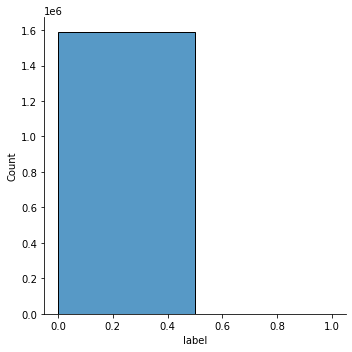

In [15]:
sns.displot(df['label'],bins=2)
plt.show()

In [12]:
df[df['label'] == 0]

,time,feature0,feature1,feature4,feature5,feature6,feature8,feature9,feature11,feature12,feature13,feature14,feature15,feature16,feature18,feature20,feature22,label
0,3.0,-422.837425,760.707943,7.202936,-10.915132,-3.458406,2.441702,1.370284,0.282731,0.056079,0.513652,-0.471602,-0.140629,0.178008,-0.021356,-0.009304,-0.021152,0
1,6.0,-394.596676,-372.770445,104.952037,-37.735253,-12.194233,6.927474,-0.547133,-0.346499,1.250504,-0.219448,0.778082,1.560081,-0.172821,-0.397619,-0.094427,-0.000693,0
2,6.0,-437.242768,-327.536604,-118.581570,8.324652,-3.434593,9.293879,17.778668,0.063813,-0.078189,0.017686,-0.548022,-0.276188,-0.304188,-0.024227,-0.128246,-0.001266,0
3,8.0,-329.477487,-317.287401,-111.556155,-60.209254,-3.297218,6.158783,-2.122761,-0.770122,-0.481241,-0.077101,-0.053544,1.075226,-0.679411,0.957184,0.020177,-0.022051,0
4,56.0,-439.454769,-360.694265,122.630552,-87.962271,-15.032204,-9.432846,1.225569,-1.041522,-1.858349,0.203502,0.293755,0.554647,-0.802328,-0.048390,-0.178744,-0.022543,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593091,83604.0,9457.161439,672.448452,-9.894481,76.746030,6.531892,-5.395322,-0.727164,-2.054538,-0.915060,2.420714,0.914444,1.552135,0.578813,0.010247,0.038943,0.048141,0
1593092,83675.0,-441.008438,639.200537,-11.657303,68.884666,5.231016,-5.143300,-0.574023,-2.274011,-0.897177,2.606040,-0.751633,0.309864,0.517899,0.019830,-0.021146,0.001442,0
1593093,83779.0,-436.169606,646.253188,-13.901599,70.526210,5.524197,-4.806638,-0.529420,-2.235967,-0.899177,2.629513,-1.485556,-0.239709,0.533735,0.020180,0.000299,0.001129,0
1593094,85743.0,-422.636754,650.769844,-15.335591,71.545871,5.678248,-4.759558,-0.505333,-2.221825,-0.882586,2.547808,-0.659200,0.347368,0.534015,0.023246,-0.000100,0.001087,0


In [13]:
df[df['label'] == 1]

,time,feature0,feature1,feature4,feature5,feature6,feature8,feature9,feature11,feature12,feature13,feature14,feature15,feature16,feature18,feature20,feature22,label
2913,12162.0,-439.049164,-317.070532,-96.223937,-73.290642,-6.382726,-12.592061,-0.615997,-2.991651,0.731164,0.305075,0.738194,-0.252430,-0.624340,0.894878,-0.134501,0.008152,1
2914,12162.0,-439.049164,-317.070532,-96.223937,-73.290642,-6.382726,-12.592061,-0.615997,-2.991651,0.731164,0.305075,0.738194,-0.252430,-0.624340,0.894878,-0.134501,0.008152,1
3279,15094.0,-431.403793,-300.718997,-132.397738,52.140358,-2.297970,4.350611,-2.883148,-0.716945,-0.804411,0.044863,-0.072197,1.012253,-0.681351,1.063881,-0.019774,0.001587,1
3280,15094.0,-431.403793,-300.718997,-132.397738,52.140358,-2.297970,4.350611,-2.883148,-0.716945,-0.804411,0.044863,-0.072197,1.012253,-0.681351,1.063881,-0.019774,0.001587,1
3294,15132.0,-408.379220,-308.873280,-129.749493,50.301024,-2.575501,4.263472,-2.925833,-0.736356,-0.828276,0.143897,-0.911333,0.428936,-0.686759,1.061518,-0.025257,0.001070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483178,75474.0,-431.909949,-340.413082,82.081248,57.292461,-10.739439,5.655293,-1.077776,-0.286160,1.009234,-0.089739,-0.766359,0.329221,-0.134759,-0.323335,-0.080179,0.001561,1
1483191,75490.0,-437.492480,-335.752183,-109.346787,-23.822039,105.916703,-8.066266,0.859507,-2.405044,2.518078,-2.221633,-0.974973,0.299705,2.701287,1.170220,-0.021443,-0.012886,1
1483192,75490.0,-437.492480,-335.752183,-109.346787,-23.822039,105.916703,-8.066266,0.859507,-2.405044,2.518078,-2.221633,-0.974973,0.299705,2.701287,1.170220,-0.021443,-0.012886,1
1486699,82267.0,-430.015665,-339.985314,121.132887,-104.562427,-14.864381,-11.757789,1.726812,-1.054796,-2.044839,-0.360145,-1.437723,-0.391690,-0.036785,0.018264,-0.121152,0.001259,1


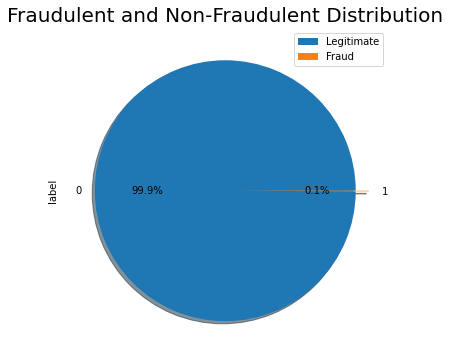

In [17]:
df["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Legitimate", "Fraud"])
plt.show()